## Comparison between xmask and pymask machines

### Imports modules

In [1]:
import numpy as np
import xtrack as xt
import xpart as xp
import pandas as pd
import json
import matplotlib.pyplot as plt
import yaml 
# Plotting function
from plotting_functions import plot_all

# Plotly renderer
import plotly.io as pio

# ! Renderer should be set to 'notebook' or 'vscode' (depending on the IDE used) for interactive plots
pio.renderers.default = "browser"

### Build pymask line

In [2]:
path = "pymask/xsuite_lines/line_bb_for_tracking.json"
with open(path) as fid:
    dd = json.load(fid)
p_co = xp.Particles.from_dict(dd["particle_on_tracker_co"])
pm_line = xt.Line.from_dict(dd)
pm_line.particle_ref = xp.Particles.from_dict(dd["particle_on_tracker_co"])
pm_line.build_tracker()

Done loading line from dict.           
Compiling ContextCpu kernels...


08da267e3f024f4f8f0629a8097821f4.c:4355: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 08da267e3f024f4f8f0629a8097821f4.c:50:
/afs/cern.ch/work/c/cdroin/private/comparison_pymask_xmask/miniconda/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.


In [3]:
# for i, x in enumerate(pm_line.element_names):
#     if 'bb_ho' in x or 'bb_lr' in x:
#         print(x)

# for i, x in enumerate(pm_line.element_names):
#     if "bb_ho" in x or "bb_lr" in x:
#         print(x, pm_line.element_refs[x].scale_strength._value)

### Build xmask line

In [4]:
collider = xt.Multiline.from_json("xmask/xsuite_lines/collider_04_tuned_and_leveled_bb_on.json")
collider.build_trackers()

b1 = True
if b1:
    xm_line = collider["lhcb1"]
else:
    xm_line = collider["lhcb2"]

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...


0aef3b613b974fdf8a1f43d0167af773.c:4355: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 0aef3b613b974fdf8a1f43d0167af773.c:50:
/afs/cern.ch/work/c/cdroin/private/comparison_pymask_xmask/miniconda/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


7013269d594b48ccbb8b1a3ff30c7f21.c:4355: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 7013269d594b48ccbb8b1a3ff30c7f21.c:50:
/afs/cern.ch/work/c/cdroin/private/comparison_pymask_xmask/miniconda/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


### Compare elements in both lines

#### Check element names which differ


In [5]:
# Get element names in pymask and xmask
set_pm = set(pm_line.element_names)
set_xm = set(xm_line.element_names)

# Get elements in pymask but not in xmask
set_pm_not_xm = set_pm - set_xm
print("Elements in pymask but not in xmask", set_pm_not_xm)
print(
    "Elements in xmask but not in pymask that are not drifts",
    [x for x in set_pm_not_xm if "drift" not in x],
)

# Get elements in xmask but not in pymask
set_xm_not_pm = set_xm - set_pm
print("Elements in pymask but not in xmask", set_xm_not_pm)
print("Elements in pymask but not in xmask", [x for x in set_xm_not_pm if "drift" not in x])

Elements in pymask but not in xmask {'drift_7099', 'drift_2949', 'drift_2865', 'drift_7144', 'drift_11903', 'drift_11885', 'drift_11927', 'drift_11905', 'drift_10303', 'drift_8577', 'drift_7108', 'drift_11842', 'drift_11809', 'drift_8864', 'drift_11807', 'drift_7073', 'drift_10371', 'drift_11824', 'drift_10307', 'drift_11915', 'drift_11923', 'drift_8787', 'drift_11860', 'drift_11796', 'drift_7214', 'drift_11800', 'drift_11827', 'drift_11857', 'drift_10392', 'drift_11856', 'drift_11795', 'drift_8648', 'drift_11902', 'drift_7129', 'drift_8724', 'drift_11821', 'drift_10393', 'drift_2858', 'drift_7169', 'drift_10309', 'drift_11855', 'drift_8578', 'drift_2965', 'drift_2860', 'drift_7230', 'drift_10267', 'drift_2979', 'drift_11850', 'drift_2926', 'drift_11791', 'drift_7241', 'drift_11844', 'drift_2996', 'drift_7178', 'drift_7155', 'drift_2727', 'drift_11889', 'drift_10366', 'drift_2735', 'drift_3006', 'drift_11822', 'drift_11783', 'drift_8810', 'drift_2862', 'drift_11840', 'drift_11849', 'dr

#### Check if some dipoles differ


In [6]:
dipole_names = [x for x in pm_line.element_names if "mb" in x]
for i, dipole in enumerate(dipole_names):
    class_element = pm_line[dipole].to_dict()["__class__"]
    if class_element != "Marker" and class_element != "Drift":
        try:
            if class_element == "SRotation":
                assert pm_line[dipole].cos_z == xm_line[dipole].cos_z
                assert pm_line[dipole].sin_z == xm_line[dipole].sin_z
                assert pm_line[dipole].angle == xm_line[dipole].angle
            else:
                assert pm_line[dipole].length == xm_line[dipole].length
                assert pm_line[dipole].hxl == xm_line[dipole].hxl
                assert pm_line[dipole].hyl == xm_line[dipole].hyl
                assert pm_line[dipole].knl[0] == xm_line[dipole].knl[0]
                assert pm_line[dipole].ksl[0] == xm_line[dipole].ksl[0]
        except:
            try:
                print("PM", dipole, pm_line[dipole].to_dict())
            except Exception as e:
                print(e)
            try:
                print("XM", dipole, xm_line[dipole].to_dict())
            except Exception as e:
                print(e)

PM mbxws.1l8_tilt_entry {'__class__': 'SRotation', 'cos_z': 0.9999101428712824, 'sin_z': 0.01340545348475305, 'angle': 0.7680989136607647}
XM mbxws.1l8_tilt_entry {'__class__': 'SRotation', 'cos_z': 0.9999101428712823, 'sin_z': 0.01340545348475305, 'angle': 0.7680989136607648}
PM mbxws.1l8_tilt_exit {'__class__': 'SRotation', 'cos_z': 0.9999101428712824, 'sin_z': -0.01340545348475305, 'angle': -0.7680989136607647}
XM mbxws.1l8_tilt_exit {'__class__': 'SRotation', 'cos_z': 0.9999101428712823, 'sin_z': -0.01340545348475305, 'angle': -0.7680989136607648}
PM mbxwh.1l8_tilt_entry {'__class__': 'SRotation', 'cos_z': 0.9999101428712824, 'sin_z': 0.01340545348475305, 'angle': 0.7680989136607647}
XM mbxwh.1l8_tilt_entry {'__class__': 'SRotation', 'cos_z': 0.9999101428712823, 'sin_z': 0.01340545348475305, 'angle': 0.7680989136607648}
PM mbxwh.1l8_tilt_exit {'__class__': 'SRotation', 'cos_z': 0.9999101428712824, 'sin_z': -0.01340545348475305, 'angle': -0.7680989136607647}
XM mbxwh.1l8_tilt_exit {

#### Check if some multipoles differ 

In [7]:
def check_difference_multipoles(multipole_names, index_strength):
    for i, multipole in enumerate(multipole_names):
        class_element = pm_line[multipole].to_dict()["__class__"]
        if class_element != "Marker" and class_element != "Drift":
            try:
                assert pm_line[multipole].length == xm_line[multipole].length
                assert pm_line[multipole].hxl == xm_line[multipole].hxl
                assert pm_line[multipole].hyl == xm_line[multipole].hyl
                assert np.allclose(
                    pm_line[multipole].knl[index_strength], xm_line[multipole].knl[index_strength]
                )
                assert np.allclose(
                    pm_line[multipole].ksl[index_strength], xm_line[multipole].ksl[index_strength]
                )
            except:
                try:
                    print("PM", multipole, pm_line[multipole].to_dict())
                except Exception as e:
                    print(e)
                try:
                    print("XM", multipole, xm_line[multipole].to_dict())
                except Exception as e:
                    print(e)

In [8]:
# Quadrupoles
quadrupole_names = [x for x in pm_line.element_names if "mq" in x]
check_difference_multipoles(quadrupole_names, 1)

PM mqt.14r3.b1..1 {'__class__': 'Multipole', 'order': 1, 'inv_factorial_order': 1.0, 'length': 0.16, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([ 0.00000000e+00, -1.34465922e-05]), 'ksl': array([0., 0.])}
XM mqt.14r3.b1..1 {'__class__': 'Multipole', 'order': 1, 'inv_factorial_order': 1.0, 'length': 0.16, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([ 0.0000000e+00, -1.3367662e-05]), 'ksl': array([0., 0.])}
PM mqt.14r3.b1..2 {'__class__': 'Multipole', 'order': 1, 'inv_factorial_order': 1.0, 'length': 0.16, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([ 0.00000000e+00, -1.34465922e-05]), 'ksl': array([0., 0.])}
XM mqt.14r3.b1..2 {'__class__': 'Multipole', 'order': 1, 'inv_factorial_order': 1.0, 'length': 0.16, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([ 0.0000000e+00, -1.3367662e-05]), 'ksl': array([0., 0.])}
PM mqt.15r3.b1..1 {'__class__': 'Multipole', 'order': 1, 'inv_factorial_order': 1.0, 'length': 0.16, 'hxl': 0.0, 'hyl': 0.0,

In [9]:
# Sextupoles
sextupole_names = [x for x in pm_line.element_names if "ms" in x]
check_difference_multipoles(sextupole_names, 2)

PM ms.11r3.b1 {'__class__': 'Multipole', 'order': 2, 'inv_factorial_order': 0.5, 'length': 0.369, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([0.        , 0.        , 0.02854976]), 'ksl': array([0., 0., 0.])}
XM ms.11r3.b1 {'__class__': 'Multipole', 'order': 2, 'inv_factorial_order': 0.5, 'length': 0.369, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([0.        , 0.        , 0.02854926]), 'ksl': array([0., 0., 0.])}
PM ms.13r3.b1 {'__class__': 'Multipole', 'order': 2, 'inv_factorial_order': 0.5, 'length': 0.369, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([0.        , 0.        , 0.02854976]), 'ksl': array([0., 0., 0.])}
XM ms.13r3.b1 {'__class__': 'Multipole', 'order': 2, 'inv_factorial_order': 0.5, 'length': 0.369, 'hxl': 0.0, 'hyl': 0.0, 'radiation_flag': 0, 'knl': array([0.        , 0.        , 0.02854926]), 'ksl': array([0., 0., 0.])}
PM ms.15r3.b1 {'__class__': 'Multipole', 'order': 2, 'inv_factorial_order': 0.5, 'length': 0.369, 'hxl': 0.0

In [10]:
# Octupoles
octupole_names = [x for x in pm_line.element_names if "mo" in x]
check_difference_multipoles(octupole_names, 3)

### Check that main observables are the same

In [11]:
tw_xm_1 = collider["lhcb1"].twiss()
tw_pm_1 = pm_line.twiss()

In [12]:
print("Tune pymask x:", tw_pm_1.qx)
print("Tune xmask x:", tw_xm_1.qx)
print()
print("Tune pymask y:", tw_pm_1.qy)
print("Tune xmask y:", tw_xm_1.qy)
print()
print("Chromaticity pymask x:", tw_pm_1.dqx)
print("Chromaticity xmask x:", tw_xm_1.dqx)
print()
print("Chromaticity pymask y:", tw_pm_1.dqy)
print("Chromaticity xmask y:", tw_xm_1.dqy)
print()
print("Linear coupling pymask:", tw_pm_1.c_minus)
print("Linear coupling xmask:", tw_xm_1.c_minus)


Tune pymask x: 62.30078439642992
Tune xmask x: 62.300689144714205

Tune pymask y: 60.3058299183321
Tune xmask y: 60.30574769482529

Chromaticity pymask x: 20.700773701105568
Chromaticity xmask x: 21.137507423893698

Chromaticity pymask y: 12.49123033648436
Chromaticity xmask y: 12.719712862285514

Linear coupling pymask: 0.002651351927018092
Linear coupling xmask: 0.00262071178483922


In [13]:
for ip in [1,2,5,8]:
    print("Pymask", tw_pm_1.rows[f'ip{ip}'].cols['s', 'x', 'px', 'y', 'py', 'betx', 'bety'].to_pandas())
    print("Xmask", tw_xm_1.rows[f'ip{ip}'].cols['s', 'x', 'px', 'y', 'py', 'betx', 'bety'].to_pandas())
    print()

Pymask   name           s             x       px             y            py   
0  ip1  19994.1624 -9.040518e-08  0.00025 -1.111635e-08  2.720229e-07  \

       betx      bety  
0  0.166536  0.069697  
Xmask   name           s             x       px             y            py   
0  ip1  19994.1624 -9.058371e-08  0.00025 -1.163241e-08  2.685045e-07  \

       betx      bety  
0  0.166967  0.069883  

Pymask   name             s         x            px             y      py      betx   
0  ip2  23326.598984 -0.000145  2.224979e-07 -9.038939e-08 -0.0001  9.275109  \

       bety  
0  8.774204  
Xmask   name             s         x            px             y      py      betx   
0  ip2  23326.598984 -0.000146  2.239214e-07 -8.548147e-08 -0.0001  9.298304  \

       bety  
0  8.797357  

Pymask   name            s             x            px             y       py   
0  ip5  6664.568433  7.122111e-08  1.365069e-07 -2.404892e-08  0.00025  \

       betx     bety  
0  0.065794  0.16875  
Xm

In [14]:
# Get lumi config from pymask (should be identical in xmask)
with open("pymask/config.yaml", "r") as fid:
        configuration = yaml.safe_load(fid)
n_col_ip1 = int(configuration["nco_IP1"])
n_col_ip2 = int(configuration["nco_IP2"])
n_col_ip5 = int(configuration["nco_IP5"])
n_col_ip8 = int(configuration["nco_IP8"])
num_particles_per_bunch = float(configuration["beam_npart"])
nemitt_x = configuration["beam_norm_emit_x"] * 1e-6
nemitt_y = configuration["beam_norm_emit_y"] * 1e-6
sigma_z = configuration["beam_sigt"]

# Get twiss for each beam
tw_xm_1 = collider["lhcb1"].twiss()
tw_xm_2 = collider["lhcb2"].twiss()

# Check luminosity at each ip
for ip, n_col in zip([1,2,5,8], [n_col_ip1, n_col_ip2, n_col_ip5, n_col_ip8]):
        print("XM lumi at ip" + str(ip), xt.lumi.luminosity_from_twiss(
        n_colliding_bunches=n_col,
        num_particles_per_bunch=num_particles_per_bunch,
        ip_name='ip' + str(ip),
        nemitt_x=nemitt_x,
        nemitt_y=nemitt_y,
        sigma_z=sigma_z,
        twiss_b1=tw_xm_1,
        twiss_b2=tw_xm_2,
        crab=False))
        
print("PM lumi at ip8 from config: ", configuration['lumi_ip8'])

XM lumi at ip1 3.518466584280543e+34
XM lumi at ip2 7.082543823054985e+29
XM lumi at ip5 3.471599574239021e+34
XM lumi at ip8 1.949548929719923e+33
PM lumi at ip8 from config:  2e+33


In [15]:
# Compare separation values
print('XM on_sep8h: ', collider.vars['on_sep8h']._value)
print('PM on_sep8h: ', pm_line.vars['on_sep8h']._value)
print('XM on_sep8v: ', collider.vars['on_sep8v']._value)
print('PM on_sep8v: ', pm_line.vars['on_sep8v']._value)
print('XM on_sep2: ', collider.vars['on_sep2']._value)
print('PM on_sep2: ', pm_line.vars['on_sep2']._value)

XM on_sep8h:  -0.017236902955230535
PM on_sep8h:  -0.017456415017191276
XM on_sep8v:  0.013666895040843308
PM on_sep8v:  0.01371863979152592
XM on_sep2:  0.14523418016498574
PM on_sep2:  0.1443593672910653


### Replace the pymaks bb values with the xmask ones

In [16]:
# ! Probably no applicable if levelling in pymask and not in xmask
for x in collider.lhcb1.element_dict:#collider.lhcb1.element_dict:
    dic_el = collider.lhcb1.element_dict[x].to_dict()
    if "bb" in x and dic_el['__class__']!='Drift':
        for key in dic_el:
            if key!='__class__':
                try:
                    setattr(pm_line.element_refs[x], key, dic_el[key])
                except Exception as e:
                    print(e)

tw_pm_1 = pm_line.twiss()


'bb_lr.l1b1_05'
'bb_lr.l1b1_05'
'bb_lr.l1b1_05'
'bb_lr.l1b1_05'
'bb_lr.l1b1_05'
'bb_lr.l1b1_05'
'bb_lr.l1b1_05'
'bb_lr.l1b1_05'
'bb_lr.l1b1_05'
'bb_lr.l1b1_05'
'bb_lr.l1b1_05'
'bb_lr.l1b1_05'
'bb_lr.l1b1_05'
'bb_lr.l1b1_05'
'bb_lr.l1b1_06'
'bb_lr.l1b1_06'
'bb_lr.l1b1_06'
'bb_lr.l1b1_06'
'bb_lr.l1b1_06'
'bb_lr.l1b1_06'
'bb_lr.l1b1_06'
'bb_lr.l1b1_06'
'bb_lr.l1b1_06'
'bb_lr.l1b1_06'
'bb_lr.l1b1_06'
'bb_lr.l1b1_06'
'bb_lr.l1b1_06'
'bb_lr.l1b1_06'
'bb_lr.l1b1_07'
'bb_lr.l1b1_07'
'bb_lr.l1b1_07'
'bb_lr.l1b1_07'
'bb_lr.l1b1_07'
'bb_lr.l1b1_07'
'bb_lr.l1b1_07'
'bb_lr.l1b1_07'
'bb_lr.l1b1_07'
'bb_lr.l1b1_07'
'bb_lr.l1b1_07'
'bb_lr.l1b1_07'
'bb_lr.l1b1_07'
'bb_lr.l1b1_07'
'bb_lr.l1b1_08'
'bb_lr.l1b1_08'
'bb_lr.l1b1_08'
'bb_lr.l1b1_08'
'bb_lr.l1b1_08'
'bb_lr.l1b1_08'
'bb_lr.l1b1_08'
'bb_lr.l1b1_08'
'bb_lr.l1b1_08'
'bb_lr.l1b1_08'
'bb_lr.l1b1_08'
'bb_lr.l1b1_08'
'bb_lr.l1b1_08'
'bb_lr.l1b1_08'
'bb_lr.l1b1_17'
'bb_lr.l1b1_17'
'bb_lr.l1b1_17'
'bb_lr.l1b1_17'
'bb_lr.l1b1_17'
'bb_lr.l1b1_17'
'bb_lr.l

In [17]:
tw_xm_1 = collider["lhcb1"].twiss()
tw_pm_1 = pm_line.twiss()

print("Tune pymask x:", tw_pm_1.qx)
print("Tune xmask x:", tw_xm_1.qx)
print()
print("Tune pymask y:", tw_pm_1.qy)
print("Tune xmask y:", tw_xm_1.qy)
print()
print("Chromaticity pymask x:", tw_pm_1.dqx)
print("Chromaticity xmask x:", tw_xm_1.dqx)
print()
print("Chromaticity pymask y:", tw_pm_1.dqy)
print("Chromaticity xmask y:", tw_xm_1.dqy)
print()
print("Linear coupling pymask:", tw_pm_1.c_minus)
print("Linear coupling xmask:", tw_xm_1.c_minus)

Tune pymask x: 62.30077447298438
Tune xmask x: 62.300689144714205

Tune pymask y: 60.30580981670384
Tune xmask y: 60.30574769482529

Chromaticity pymask x: 21.09844609187811
Chromaticity xmask x: 21.137507423893698

Chromaticity pymask y: 12.696316945932095
Chromaticity xmask y: 12.719712862285514

Linear coupling pymask: 0.002615442691219741
Linear coupling xmask: 0.00262071178483922


In [18]:
# Deactivate bb and see how values change
collider.vars['beambeam_scale'] = 0

# Set knob for 'on_bb_charge' for pymask
for i, x in enumerate(tw_pm_1.to_pandas().name):
    if "bb_lr" in x or "bb_ho" in x:
        pm_line.element_refs[x].scale_strength = pm_line.vars["on_bb_charge"]

pm_line.vars["on_bb_charge"] = 0

tw_xm_1 = collider["lhcb1"].twiss()
tw_pm_1 = pm_line.twiss()

print("Tune pymask x:", tw_pm_1.qx)
print("Tune xmask x:", tw_xm_1.qx)
print()
print("Tune pymask y:", tw_pm_1.qy)
print("Tune xmask y:", tw_xm_1.qy)
print()
print("Chromaticity pymask x:", tw_pm_1.dqx)
print("Chromaticity xmask x:", tw_xm_1.dqx)
print()
print("Chromaticity pymask y:", tw_pm_1.dqy)
print("Chromaticity xmask y:", tw_xm_1.dqy)
print()
print("Linear coupling pymask:", tw_pm_1.c_minus)
print("Linear coupling xmask:", tw_xm_1.c_minus)

# Reactive bb
collider.vars['beambeam_scale'] = 1
pm_line.vars["on_bb_charge"] = 1



Tune pymask x: 62.316063527231705
Tune xmask x: 62.31600068362629

Tune pymask y: 60.3210573385225
Tune xmask y: 60.32100069477919

Chromaticity pymask x: 14.997320461070661
Chromaticity xmask x: 14.996008664119042

Chromaticity pymask y: 14.998522175515005
Chromaticity xmask y: 14.99832629743958

Linear coupling pymask: 3.4014482806855364e-05
Linear coupling xmask: 3.451355819682961e-05


In [19]:
change_coupling = False

# Save coupling values
c_minus_re_b1_before_correction = collider.vars['c_minus_re_b1']._value
c_minus_re_b2_before_correction = collider.vars['c_minus_re_b2']._value
c_minus_im_b1_before_correction = collider.vars['c_minus_im_b1']._value
c_minus_im_b2_before_correction = collider.vars['c_minus_im_b2']._value
cmrskew = pm_line.vars['cmrskew']._value
cmiskew = pm_line.vars['cmiskew']._value
    
if change_coupling:
    # Update linear coupling as well
    print([x for x in list(collider.vars._get_value().items()) if "c_minus" in x[0]])

    collider.vars['c_minus_re_b1'] += 0.001
    collider.vars['c_minus_re_b2'] += 0.001

    print(collider.vars['c_minus_re_b1']._get_value())

    tw_xm_1 = collider["lhcb1"].twiss()
    tw_xm_2 = collider["lhcb2"].twiss()

    print(tw_xm_1.c_minus, tw_xm_2.c_minus)

### Plot everything in an interactive widget

In [20]:
tw_xm_1 = collider["lhcb1"].twiss()
tw_xm_2 = collider["lhcb2"].twiss()
    
fig = plot_all(tw_pm_1, tw_xm_1, tw_xm_2)

fig.write_html("widgets/widget.html", config = {'displayModeBar': False})
fig.show(config = {'displayModeBar': False})

/afs/cern.ch/work/c/cdroin/private/comparison_pymask_xmask/plotting_functions.py:281: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/afs/cern.ch/work/c/cdroin/private/comparison_pymask_xmask/plotting_functions.py:290: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



### Plot footprint again

0.0026203728167609242
0.00262071178483922
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


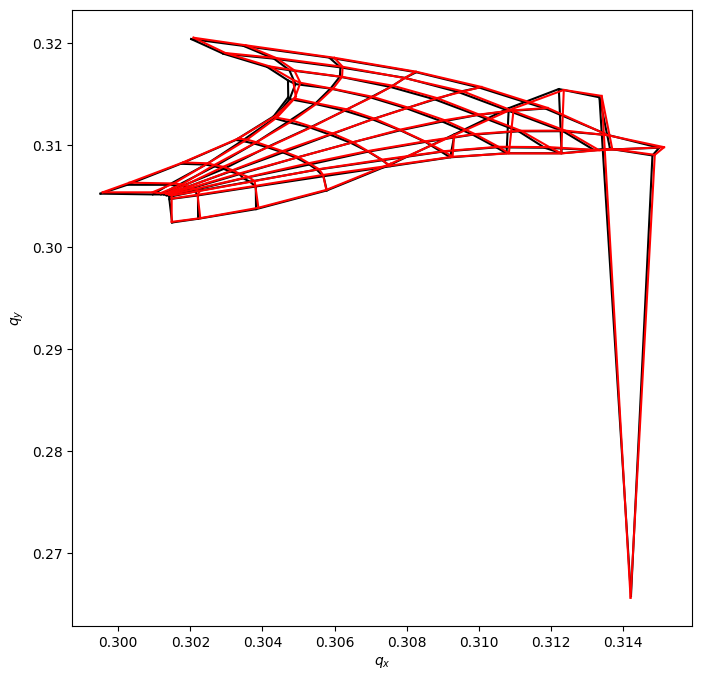

In [21]:
# Temporary remove coupling to get a better footprint
collider.vars['c_minus_re_b1'] = 0
collider.vars['c_minus_re_b2'] = 0
collider.vars['c_minus_im_b1'] = 0
collider.vars['c_minus_im_b2'] = 0
pm_line.vars['cmrskew'] = 0
pm_line.vars['cmiskew'] = 0

### CHECK
tw_pm_1 = pm_line.twiss()
tw_xm_1 = collider["lhcb1"].twiss()

print(tw_pm_1.c_minus)
print(tw_xm_1.c_minus)

# Plot footprint
fp_polar_xm = collider["lhcb1"].get_footprint(
    nemitt_x=2.5e-6,
    nemitt_y=2.5e-6,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1/2)],
)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
fp_polar_xm.plot(ax=ax, label="no rescale bb")
#plt.suptitle("Polar mode (default) - no rescale on beambeam. Xmask.")
#plt.show()


fp_polar = pm_line.get_footprint(
    nemitt_x=2.5e-6,
    nemitt_y=2.5e-6,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="on_bb_charge", v0=0.0, dv=0.1/2)],
)

#fig, ax = plt.subplots(1, 1, figsize=(8, 8))
fp_polar.plot(ax=ax, label="no rescale bb", color = 'red')
#plt.suptitle("Polar mode (default)")
plt.show()

# Set back coupling
collider.vars['c_minus_re_b1'] = c_minus_re_b1_before_correction #+ 0.001
collider.vars['c_minus_re_b2'] = c_minus_re_b2_before_correction #+ 0.001
collider.vars['c_minus_im_b1'] = c_minus_im_b1_before_correction 
collider.vars['c_minus_im_b2'] = c_minus_im_b2_before_correction 
pm_line.vars['cmrskew'] = cmrskew
pm_line.vars['cmiskew'] = cmiskew

tw_pm_1 = pm_line.twiss()
tw_xm_1 = collider["lhcb1"].twiss()



0.002615442691219741
0.00262071178483922
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


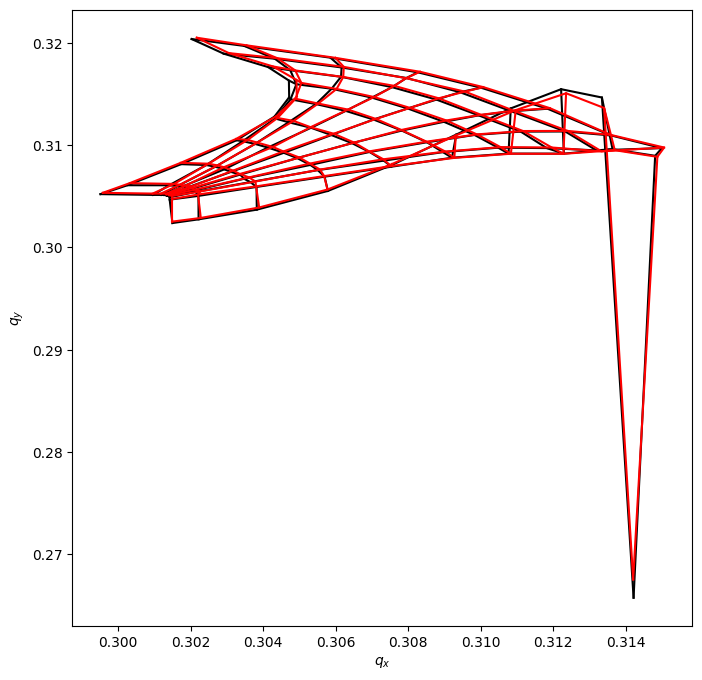

In [22]:
### Same as before without touching coupling knobs
### CHECK c_minus first
print(tw_pm_1.c_minus)
print(tw_xm_1.c_minus)

# Plot footprint
fp_polar_xm = collider["lhcb1"].get_footprint(
    nemitt_x=2.5e-6,
    nemitt_y=2.5e-6,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1/2)],
)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
fp_polar_xm.plot(ax=ax, label="no rescale bb")
#plt.suptitle("Polar mode (default) - no rescale on beambeam. Xmask.")
#plt.show()


fp_polar = pm_line.get_footprint(
    nemitt_x=2.5e-6,
    nemitt_y=2.5e-6,
    linear_rescale_on_knobs=[xt.LinearRescale(knob_name="on_bb_charge", v0=0.0, dv=0.1/2)],
)

#fig, ax = plt.subplots(1, 1, figsize=(8, 8))
fp_polar.plot(ax=ax, label="no rescale bb", color = 'red')
#plt.suptitle("Polar mode (default)")
plt.show()